In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse
print('import finish')

2023-04-12 00:53:13.994421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


import finish


In [2]:
joint_number = 12

In [1]:
input_tables = []
for i in range(1, 6):
    input_tables.append(np.loadtxt(f'./Data/data{i}.txt', skiprows=3))
input_tables = np.array(input_tables)
print(input_tables.shape)

NameError: name 'np' is not defined

In [8]:
dataset = np.loadtxt(f'dataset.txt', skiprows=3)
print(dataset.shape)

(9701, 37)


In [48]:
def asdf():
    # test
    vels = np.array([
        [1,2,3],
        [4,4,4],
        [5,6,7],
    ])
    diff_v = (np.diff(vels, axis=0))
    print(diff_v.shape)
    diff_t = np.array([
        2,
        2,
    ])
    print(diff_t.shape)
#     print(diff_v/diff_t)
    np.divide(diff_v/diff_t)
asdf()

(2, 3)
(2,)


ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [41]:
full_dataset = np.array(dataset)
time = full_dataset[:, 0]
velocities = full_dataset[:, 2::3]
print(f'velocities.shape:{velocities.shape}')
diff_v = np.diff(velocities, axis=0)
print(f'diff_v.shape:{diff_v.shape}')
diff_t = np.diff(time)
print(f'diff_t.shape:{diff_t.shape}')
acc = np.transpose(diff_v/diff_t)
full_dataset = np.insert(full_dataset[0:-1], list(range(3, 3 * joint_number + 1, 3)), acc, axis=1)


velocities.shape:(9701, 12)
diff_v.shape:(9700, 12)
diff_t.shape:(9700,)


ValueError: operands could not be broadcast together with shapes (9700,12) (9700,) 

In [ ]:
diff_v = np.diff(velocities)
diff_t = np.diff(time)

In [288]:
inp_tables_with_acc = []
for table in input_tables:
    time = table[:, 0]
    velocities = np.transpose(table[:, 2::3])
    diff_v = np.diff(velocities)
    diff_t = np.diff(time)
    acc = np.transpose(diff_v/diff_t)
    table = np.insert(table[0:-1], list(range(3, 3 * joint_number + 1, 3)), acc, axis=1)
    inp_tables_with_acc.append(table)
    
full_tables = np.array(inp_tables_with_acc)
print(full_tables.shape)
print(full_tables)

(5, 59, 49)
[[[ 5.00000000e-02  3.07201000e-05 -7.15358000e-04 ...  5.47152000e-05
   -2.17230600e-03 -4.02989000e-03]
  [ 1.00000000e-01  9.53301000e-06 -2.55349000e-04 ... -5.39001000e-05
   -2.74274000e-04 -8.34560000e-03]
  [ 1.50000000e-01  1.99335000e-06 -9.05225000e-05 ... -6.76138000e-05
    9.21980000e-05 -1.13010000e-02]
  ...
  [ 2.85000000e+00 -5.64755000e-07  2.37930000e-07 ... -3.29625000e-03
    9.40180000e-03 -6.77483000e-03]
  [ 2.90000000e+00  4.23456000e-03  1.52465000e-01 ... -2.82616000e-03
    6.81923200e-02 -6.85378000e-05]
  [ 2.95000000e+00  8.97750000e-03  4.67416000e-02 ...  5.83456000e-04
    4.52938800e-02 -5.93106000e-03]]

 [[ 5.00000000e-02  3.07201000e-05 -7.15358000e-04 ...  5.47152000e-05
   -2.17230600e-03 -4.02989000e-03]
  [ 1.00000000e-01  9.53301000e-06 -2.55349000e-04 ... -5.39001000e-05
   -2.74274000e-04 -8.34560000e-03]
  [ 1.50000000e-01  1.99335000e-06 -9.05225000e-05 ... -6.76138000e-05
    9.21980000e-05 -1.13010000e-02]
  ...
  [ 2.85000

In [289]:
exampleInput = [
#    time, pos, vel, acc, torque, pos2, vel2, acc2, torque2, ...
    [0,    1,   2,   3,   4,      5,    6,    7,    8],
    [0,    1,   2,   3,   4,      5,    6,    7,    8],
]
exampleInput = np.array(exampleInput)
print(exampleInput)
print(exampleInput.shape)


[[0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]]
(2, 9)


In [290]:
# remove torques
trainX = np.delete(exampleInput, slice(0, None, 4), 1)
print(trainX)
print(trainX.shape)

[[1 2 3 5 6 7]
 [1 2 3 5 6 7]]
(2, 6)


In [291]:
table = np.concatenate(full_tables)

In [292]:
# remote time column
table = table[:, 1:]

In [293]:
# interpolate ex
arr = np.arange(9).reshape(3, 3)
print(arr)
maxes = np.max(arr, axis=0)
print(arr.shape)
arr/maxes

[[0 1 2]
 [3 4 5]
 [6 7 8]]
(3, 3)


array([[0.        , 0.14285714, 0.25      ],
       [0.5       , 0.57142857, 0.625     ],
       [1.        , 1.        , 1.        ]])

In [294]:
# interpolate
maxes = np.max(table, axis=0)
print(table)
table_interpolated = table/maxes
print(np.max(table_interpolated))

[[ 3.072010e-05 -7.153580e-04  9.200180e-03 ...  5.471520e-05
  -2.172306e-03 -4.029890e-03]
 [ 9.533010e-06 -2.553490e-04  3.296530e-03 ... -5.390010e-05
  -2.742740e-04 -8.345600e-03]
 [ 1.993350e-06 -9.052250e-05  1.173442e-03 ... -6.761380e-05
   9.219800e-05 -1.130100e-02]
 ...
 [ 1.134280e-02  6.413630e-02 -1.817170e+00 ...  4.169280e-02
  -3.040400e-02 -7.799100e-01]
 [ 1.141800e-02 -2.672220e-02 -1.252640e-01 ...  4.017260e-02
  -6.334932e-01  4.569790e-01]
 [ 9.083140e-03 -3.298540e-02  4.221080e-01 ...  8.497940e-03
  -4.899688e-01  8.150520e-01]]
1.0


In [295]:
np.random.shuffle(table_interpolated)
train = table_interpolated[0:int(table_interpolated.shape[0] * 0.9)]
test = table_interpolated[int(table_interpolated.shape[0] * 0.9):]
print(train.shape)
print(test.shape)
print(np.max(train))

(265, 48)
(30, 48)
1.0


In [304]:
def split_to_x_y(table):
    X = np.delete(table, slice(0, None, 4), 1)
    Y = table[:, 2::4]
    return X, Y

In [305]:
(trainX, trainY), (testX, testY) = split_to_x_y(train), split_to_x_y(test)


In [308]:
model = Sequential()

model.add(Flatten(input_shape=((joint_number * 3), )))
# hidden
model.add(Dense(joint_number * 3, activation="sigmoid"))
model.add(Dense(joint_number * 3, activation="sigmoid"))
model.add(Dense(joint_number * 3, activation="sigmoid"))
# output layer
model.add(Dense(joint_number, activation="softmax"))

In [309]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(265, 36)
(265, 12)
(30, 36)
(30, 12)


In [310]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="mse", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network...
Epoch 1/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0835 - accuracy: 0.0377 - val_loss: 0.0802 - val_accuracy: 0.0333
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.0377 - val_loss: 0.0801 - val_accuracy: 0.0333
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.0377 - val_loss: 0.0801 - val_accuracy: 0.0333
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0834 - accuracy: 0.0377 - val_loss: 0.0801 - val_accuracy: 0.0333
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0834 - accuracy: 0.0377 - val_loss: 0.0801 - val_accuracy: 0.0333
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0834 - accuracy: 0.0377 - val_loss: 0.0801 - val_accuracy: 0.0333
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0834 - accuracy: 0.0377 - val_loss: 0.0800 - val_accuracy: 0.0333

In [311]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1)))

[INFO] evaluating network...
1/1 [==============================] - 0s 37ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.03      1.00      0.06         1
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         1

    accuracy                           0.03        30
   macro avg       0.00      0.10      0.01        30
weighted avg       0.00      0.03      0.00        30



/Users/altynbekaidarbekov/anaconda/anaconda3/envs/robotics_project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/altynbekaidarbekov/anaconda/anaconda3/envs/robotics_project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/altynbekaidarbekov/anaconda/anaconda3/envs/robotics_project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

NameError: name 'args' is not defined

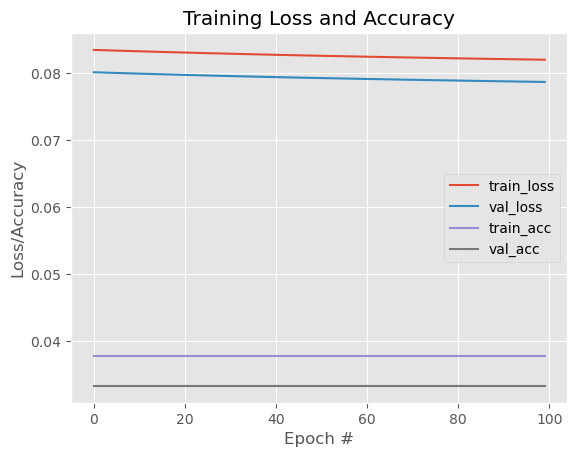

In [312]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(args["output"])